## EECS 738 Lab 4

### Step 0: Import relevant packages

In [52]:
from __future__ import print_function

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

print('The Tensorflow version is {}.'.format(tf.__version__))
print('The Keras version is {}.'.format(keras.__version__))
print('The Pandas version is {}.'.format(pd.__version__))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 25:
        lr *= 0.5e-3
    elif epoch > 20:
        lr *= 1e-3
    elif epoch > 15:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

The Tensorflow version is 2.1.0.
The Keras version is 2.2.4-tf.
The Pandas version is 0.23.4.
Packages Loaded


### Step 1: Load data in to train and test splits

In [53]:
# Lets import our MNIST data like we did in lab 3.
mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar10
(mx_train, my_train), (mx_test, my_test) = mnist.load_data()
(cx_train, cy_train), (cx_test, cy_test) = cifar.load_data()

print('Shape of mnist train data {}.'.format(mx_train.shape))
print('Shape of mnist test data {}.'.format(mx_test.shape))

print('Shape of cifar train data {}.'.format(cx_train.shape))
print('Shape of cifar test data {}.'.format(cx_test.shape))

print(type(mx_test))

Shape of mnist train data (60000, 28, 28).
Shape of mnist test data (10000, 28, 28).
Shape of cifar train data (50000, 32, 32, 3).
Shape of cifar test data (10000, 32, 32, 3).
<class 'numpy.ndarray'>


### Step2: Prepare the data

In [54]:
#Normalize the data 
mx_train = mx_train/255
mx_test = mx_test / 255

mx_train = tf.keras.utils.normalize(mx_train, axis=1)
mx_test = tf.keras.utils.normalize(mx_test, axis=1)

mx_train_hold = mx_train
my_train_hold = my_train

cx_train = tf.keras.utils.normalize(cx_train, axis=1)
cx_test = tf.keras.utils.normalize(cx_test, axis=1)

cx_train = cx_train.astype('float32')
cx_test = cx_test.astype('float32')
cx_train /= 255
cx_test /= 255

#im = mx_train[4,:,:]
#plt.imshow(im, cmap=plt.cm.binary)
 
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')


#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)
# Now import Cifar-10 data and process it.
#(train, target), (test, test_target) = cifar10.load_data()
# Fill in the rest.

### Step 3: Sequential NN shape input, 64, 64, 64, 10

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 32us/sample - loss: 0.5926 - accuracy: 0.8233 - val_loss: 0.2111 - val_accuracy: 0.9410
Epoch 2/20
54000/54000 [==============================] - 1s 27us/sample - loss: 0.2171 - accuracy: 0.9357 - val_loss: 0.1543 - val_accuracy: 0.9538
Epoch 3/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.1579 - accuracy: 0.9523 - val_loss: 0.1278 - val_accuracy: 0.9632
Epoch 4/20
54000/54000 [==============================] - 1s 27us/sample - loss: 0.1261 - accuracy: 0.9624 - val_loss: 0.1137 - val_accuracy: 0.9665
Epoch 5/20
54000/54000 [==============================] - 1s 28us/sample - loss: 0.1049 - accuracy: 0.9691 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 6/20
54000/54000 [==============================] - 1s 27us/sample - loss: 0.0888 - accuracy: 0.9729 - val_loss: 0.1021 - val_accuracy: 0.9700
Epoch 7/20
54000/54000 [==============================] -

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Sequential Neural Nets')

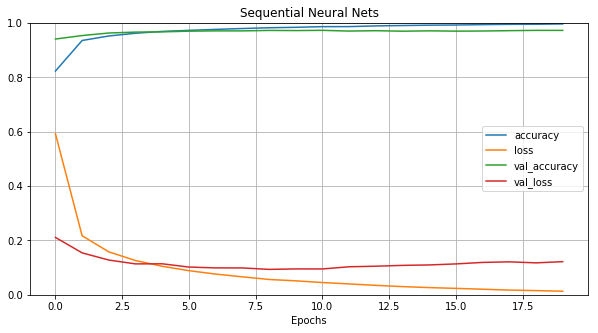

10000/10000 [==============================] - 0s 32us/sample - loss: 0.1254 - accuracy: 0.9689


[0.12535318766142883, 0.9689]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Our baseline model for this lab.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

#model.fit(mx_train, my_train, epochs=20, batch_size=64, validation_data=(mx_test, my_test))
model_detail = model.fit(mx_train, my_train, epochs=20, batch_size=64, validation_split=0.1)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Sequential Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(mx_test,my_test)

#Print the summary of the model
model.summary()

### Step 4: Convert this baseline into a Functional Model using keras' Functional Model API.
https://keras.io/getting-started/functional-api-guide/

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.6214 - accuracy: 0.8124 - val_loss: 0.2098 - val_accuracy: 0.9402
Epoch 2/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2175 - accuracy: 0.9365 - val_loss: 0.1518 - val_accuracy: 0.9555
Epoch 3/20
54000/54000 [==============================] - 1s 28us/sample - loss: 0.1595 - accuracy: 0.9524 - val_loss: 0.1198 - val_accuracy: 0.9625
Epoch 4/20
54000/54000 [==============================] - 1s 26us/sample - loss: 0.1259 - accuracy: 0.9619 - val_loss: 0.1091 - val_accuracy: 0.9670
Epoch 5/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.1026 - accuracy: 0.9693 - val_loss: 0.1113 - val_accuracy: 0.9672
Epoch 6/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.0883 - accuracy: 0.9734 - val_loss: 0.1065 - val_accuracy: 0.9700
Epoch 7/20
54000/54000 [==============================] -

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Functional Neural Nets')

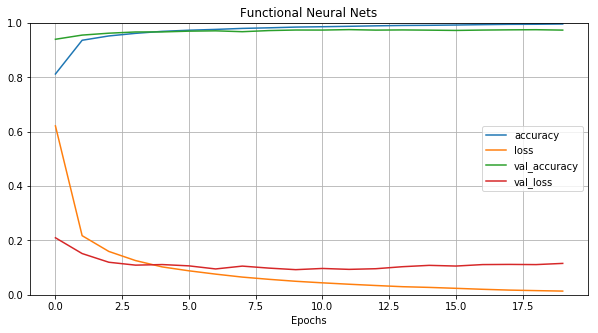

10000/10000 [==============================] - 0s 28us/sample - loss: 0.1253 - accuracy: 0.9690


[0.12528867619766387, 0.969]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_______________________________________________________

In [9]:
# Create the functional Baseline here.
input_layer = keras.layers.Input(shape=mx_train.shape[1:])
il = Flatten()(input_layer)
h1 = keras.layers.Dense(64,activation="relu")(il)
h2 = keras.layers.Dense(64,activation="relu")(h1)
h3 = keras.layers.Dense(64,activation="relu")(h2)
output_layer = keras.layers.Dense(10, activation="softmax")(h3)
fmodel = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

fmodel.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])

fmodel_detail = fmodel.fit(mx_train, my_train, epochs=20, batch_size=64, validation_split=0.1)

#plot accuracies for each epoch
fhistory = pd.DataFrame(fmodel_detail.history)
fhistory.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Functional Neural Nets')
plt.show()

#After training the model, evaluate the test set
fmodel.evaluate(mx_test,my_test)

#Print the summary of the model
fmodel.summary()

### Step 5: Shallow ResNet for MNIST.  

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 45us/sample - loss: 0.5722 - accuracy: 0.8289 - val_loss: 0.1713 - val_accuracy: 0.9543
Epoch 2/20
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2086 - accuracy: 0.9440 - val_loss: 0.1236 - val_accuracy: 0.9645
Epoch 3/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1477 - accuracy: 0.9596 - val_loss: 0.1111 - val_accuracy: 0.9687
Epoch 4/20
54000/54000 [==============================] - 2s 35us/sample - loss: 0.1118 - accuracy: 0.9696 - val_loss: 0.1039 - val_accuracy: 0.9728
Epoch 5/20
54000/54000 [==============================] - 2s 34us/sample - loss: 0.0938 - accuracy: 0.9745 - val_loss: 0.0951 - val_accuracy: 0.9752
Epoch 6/20
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0754 - accuracy: 0.9796 - val_loss: 0.0917 - val_accuracy: 0.9767
Epoch 7/20
54000/54000 [==============================] -

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Residual Neural Nets')

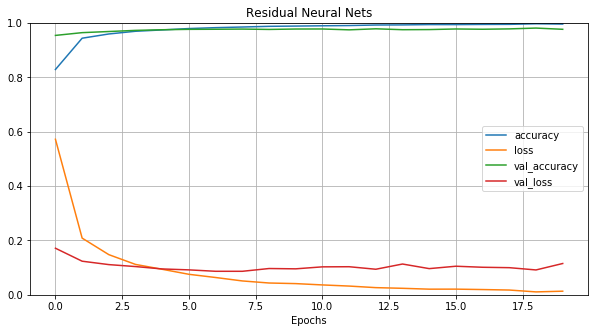

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1320 - accuracy: 0.9724


[0.132009984324011, 0.9724]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0    

In [6]:
inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(10, activation='softmax')(x)

rmodel = tf.keras.Model(inputs, outputs, name='resnet')

rmodel.compile(Adam(amsgrad=True), 'sparse_categorical_crossentropy', metrics=['accuracy'])

mx_train = mx_train.reshape(60000, 784)
mx_test = mx_test.reshape(10000, 784)
#mx_train = mx_train.astype('float32')
#mx_test = mx_test.astype('float32')

rmodel_detail = rmodel.fit(mx_train, my_train,
              batch_size=128,
              epochs=20,
              validation_split=0.1)

#plot accuracies for each epoch
rhistory = pd.DataFrame(rmodel_detail.history)
rhistory.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Residual Neural Nets')
plt.show()

#After training the model, evaluate the test set
rmodel.evaluate(mx_test,my_test)

#Print the summary of the model
rmodel.summary()

####  Analysis: 
- Accuracy: There is an increase in the training and validation accuracies.
- Speed: There has been slight increase in training speeds. Could be because of the complex nature of ResNets

### Step 6: Now lets make a deeper ResNet. Make A network with 10 Residual Blocks. 

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 12s 231us/sample - loss: 2.1663 - accuracy: 0.2324 - val_loss: 1.7797 - val_accuracy: 0.2842
Epoch 2/20
54000/54000 [==============================] - 10s 176us/sample - loss: 1.1125 - accuracy: 0.6068 - val_loss: 0.4452 - val_accuracy: 0.8578
Epoch 3/20
54000/54000 [==============================] - 10s 178us/sample - loss: 0.5670 - accuracy: 0.8381 - val_loss: 0.2244 - val_accuracy: 0.9340
Epoch 4/20
54000/54000 [==============================] - 10s 176us/sample - loss: 0.3522 - accuracy: 0.9106 - val_loss: 0.1545 - val_accuracy: 0.9572
Epoch 5/20
54000/54000 [==============================] - 10s 177us/sample - loss: 0.2654 - accuracy: 0.9353 - val_loss: 0.1361 - val_accuracy: 0.9613
Epoch 6/20
54000/54000 [==============================] - 9s 174us/sample - loss: 0.2094 - accuracy: 0.9476 - val_loss: 0.1236 - val_accuracy: 0.9655
Epoch 7/20
54000/54000 [======================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Residual Neural Nets')

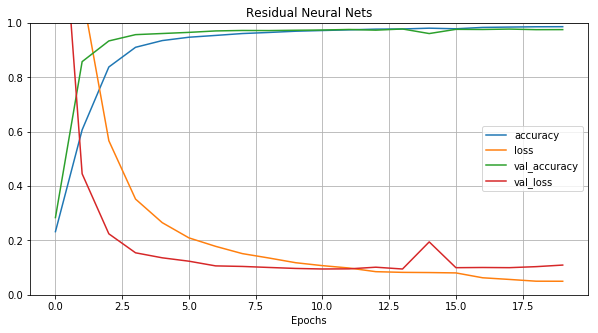

10000/10000 [==============================] - 1s 64us/sample - loss: 0.1344 - accuracy: 0.9719


[0.13437970478771605, 0.9719]

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 128)          16512       dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 128)          16512       dense_14[0][0]                   
_____________________________________________________________________________________________

In [7]:
# Create the deep ResNet here.
inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

# We will repeat above for as many times as we think our computer can handle. For now lets make just three Residual Blocks.
x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(128)(block_4_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_5_output = tf.keras.layers.add([x, block_4_output])

x = Dense(128)(block_5_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_6_output = tf.keras.layers.add([x, block_5_output])

x = Dense(128)(block_6_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_7_output = tf.keras.layers.add([x, block_6_output])

x = Dense(128)(block_7_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_8_output = tf.keras.layers.add([x, block_7_output])

x = Dense(128)(block_8_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_9_output = tf.keras.layers.add([x, block_8_output])

x = Dense(128)(block_9_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_10_output = tf.keras.layers.add([x, block_9_output])

# Now we cast the final Residual output into a dense layer to be able to classify the output easier. 
x = Dense(128, activation='relu')(block_10_output)
x = Dropout(0.5)(x)

outputs = Dense(10, activation='softmax')(x)

r10model = tf.keras.Model(inputs, outputs, name='resnet')

r10model.compile(Adam(amsgrad=True), 'sparse_categorical_crossentropy', metrics=['accuracy'])

mx_train = mx_train.reshape(60000, 784)
mx_test = mx_test.reshape(10000, 784)
#mx_train = mx_train.astype('float32')
#mx_test = mx_test.astype('float32')

r10model_detail = r10model.fit(mx_train, my_train,
              batch_size=128,
              epochs=20,
              validation_split=0.1)

#plot accuracies for each epoch
r10history = pd.DataFrame(r10model_detail.history)
r10history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Residual Neural Nets')
plt.show()

#After training the model, evaluate the test set
r10model.evaluate(mx_test,my_test)

#Print the summary of the model
r10model.summary()

#### Analysis:
- Compared to Shallow net, there is no increase in the Accuracy, but training time is increased significantly.
- We can see, in summary, significant increase in number of parameters tuned.
- I think, we do not need any extra hidden layers to handle the complexity of MNIST data. Shallow ResNet would do better with less training time.

### Step 7: ResNets that have one and three skip connections.

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 72us/sample - loss: 0.8241 - accuracy: 0.7452 - val_loss: 0.1998 - val_accuracy: 0.9430
Epoch 2/20
54000/54000 [==============================] - 3s 58us/sample - loss: 0.2604 - accuracy: 0.9300 - val_loss: 0.1220 - val_accuracy: 0.9650
Epoch 3/20
54000/54000 [==============================] - 3s 58us/sample - loss: 0.1819 - accuracy: 0.9525 - val_loss: 0.1201 - val_accuracy: 0.9653
Epoch 4/20
54000/54000 [==============================] - 3s 58us/sample - loss: 0.1338 - accuracy: 0.9639 - val_loss: 0.1097 - val_accuracy: 0.9670
Epoch 5/20
54000/54000 [==============================] - 3s 57us/sample - loss: 0.1023 - accuracy: 0.9718 - val_loss: 0.0931 - val_accuracy: 0.9735
Epoch 6/20
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0892 - accuracy: 0.9759 - val_loss: 0.0998 - val_accuracy: 0.9738
Epoch 7/20
54000/54000 [==============================] -

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Residual Neural Nets')

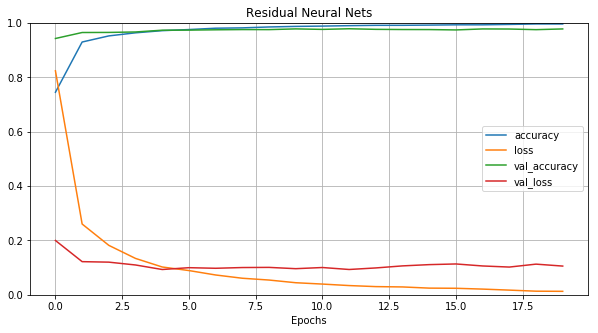

10000/10000 [==============================] - 0s 40us/sample - loss: 0.1323 - accuracy: 0.9757


[0.13233828188165084, 0.9757]

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 128)          16512       dense_35[0][0]                   
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 128)          16512       dense_36[0][0]                   
_____________________________________________________________________________________________

In [8]:
inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

# Here is a one skip connection block.
x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

# Here is a three skip connection block.
x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128, activation='relu')(block_3_output)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

r13model = tf.keras.Model(inputs, outputs, name='resnet')

r13model.compile(Adam(amsgrad=True), 'sparse_categorical_crossentropy', metrics=['accuracy'])

mx_train = mx_train.reshape(60000, 784)
mx_test = mx_test.reshape(10000, 784)
#mx_train = mx_train.astype('float32')
#mx_test = mx_test.astype('float32')

r13model_detail = r13model.fit(mx_train, my_train,
              batch_size=128,
              epochs=20,
              validation_split=0.1)

#plot accuracies for each epoch
r13history = pd.DataFrame(r13model_detail.history)
r13history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Residual Neural Nets')
plt.show()

#After training the model, evaluate the test set
r13model.evaluate(mx_test,my_test)

#Print the summary of the model
r13model.summary()

#### Analysis:
- Training speed is improved compared to 10 resnets. 
- Accuracy remained same. I think for MNIST data, we can get good accuracy with less number of trainable layers.

### Step 8: Functional Model for CIFAR with the same baseline as MNIST.

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 2s 49us/sample - loss: 2.0551 - accuracy: 0.2518 - val_loss: 2.0192 - val_accuracy: 0.2530
Epoch 2/20
45000/45000 [==============================] - 2s 45us/sample - loss: 1.8717 - accuracy: 0.3299 - val_loss: 1.9179 - val_accuracy: 0.3186
Epoch 3/20
45000/45000 [==============================] - 2s 45us/sample - loss: 1.7888 - accuracy: 0.3640 - val_loss: 1.7789 - val_accuracy: 0.3674
Epoch 4/20
45000/45000 [==============================] - 2s 45us/sample - loss: 1.7383 - accuracy: 0.3819 - val_loss: 1.7761 - val_accuracy: 0.3690
Epoch 5/20
45000/45000 [==============================] - 2s 44us/sample - loss: 1.7014 - accuracy: 0.3942 - val_loss: 1.7782 - val_accuracy: 0.3620
Epoch 6/20
45000/45000 [==============================] - 2s 44us/sample - loss: 1.6642 - accuracy: 0.4099 - val_loss: 1.7122 - val_accuracy: 0.3922
Epoch 7/20
45000/45000 [==============================] -

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Functional Neural Nets')

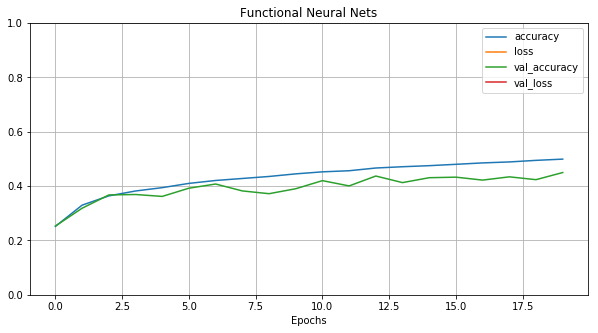

10000/10000 [==============================] - 0s 36us/sample - loss: 1.6179 - accuracy: 0.4300


[1.6179374866485596, 0.43]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_66 (Dense)             (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_____________________________________________________

In [21]:
# Create the CIFAR baseline here.
# Create the functional Baseline here.
input_layer = keras.layers.Input(shape=cx_train.shape[1:])
il = Flatten()(input_layer)
h1 = keras.layers.Dense(64,activation="relu")(il)
h2 = keras.layers.Dense(64,activation="relu")(h1)
h3 = keras.layers.Dense(64,activation="relu")(h2)
output_layer = keras.layers.Dense(10, activation="softmax")(h3)
fcmodel = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

fcmodel.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])

# Convert class vectors to binary class matrices.
cy_train = keras.utils.to_categorical(cy_train, 10)
cy_test = keras.utils.to_categorical(cy_test, 10)


fcmodel_detail = fcmodel.fit(cx_train, cy_train, epochs=20, batch_size=64, validation_split=0.1)

#plot accuracies for each epoch
fchistory = pd.DataFrame(fcmodel_detail.history)
fchistory.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Functional Neural Nets')
plt.show()

#After training the model, evaluate the test set
fcmodel.evaluate(cx_test,cy_test)

#Print the summary of the model
fcmodel.summary()

#### Analysis:
- Training speed is same for both the data datasets
- Accuracy is reduced significantly. I think, Cifar data has RGB layered images and the domain knowledge of the dataset is complex. Funtional neural network is not able to understand the complexity of the dataset which resulted in poor accuracies.

### Step 9: Shallow ResNet for CIFAR with the same layers and compare it with MNIST. 

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 330s 7ms/sample - loss: 1.7810 - accuracy: 0.3831 - val_loss: 7.7729 - val_accuracy: 0.0976
Epoch 2/20
45000/45000 [==============================] - 358s 8ms/sample - loss: 1.5499 - accuracy: 0.4672 - val_loss: 99.8459 - val_accuracy: 0.0976
Epoch 3/20
45000/45000 [==============================] - 314s 7ms/sample - loss: 1.4754 - accuracy: 0.4922 - val_loss: 3827.4924 - val_accuracy: 0.0958
Epoch 4/20
45000/45000 [==============================] - 314s 7ms/sample - loss: 17.9298 - accuracy: 0.3428 - val_loss: 102263.6198 - val_accuracy: 0.0950
Epoch 5/20
45000/45000 [==============================] - 351s 8ms/sample - loss: 10.6031 - accuracy: 0.2106 - val_loss: 17954.0223 - val_accuracy: 0.0958
Epoch 6/20
45000/45000 [==============================] - 363s 8ms/sample - loss: 6.3705 - accuracy: 0.2220 - val_loss: 11470.1549 - val_accuracy: 0.0958
Epoch 7/20
45000/45000 [========

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Residual Neural Nets')

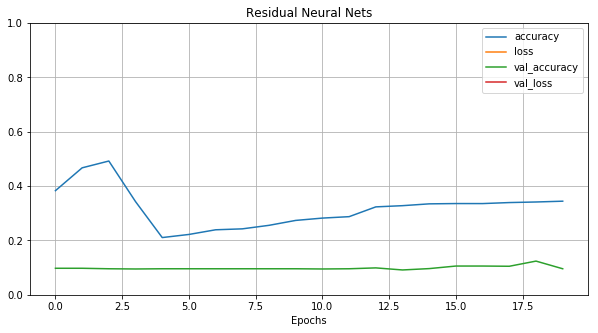

10000/10000 [==============================] - 10s 1ms/sample - loss: 24.1797 - accuracy: 0.10003s - loss: 24.0904 - accuracy: 0 - ETA: 3s - loss: 24. - ETA: 2s - loss: 24.0850 - accura - ETA: 1s - loss: 24.147


[24.179732403564454, 0.1]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
dense_134 (Dense)            (None, 32, 32, 128)       512       
_________________________________________________________________
dense_135 (Dense)            (None, 32, 32, 128)       16512     
_________________________________________________________________
dense_136 (Dense)            (None, 32, 32, 128)       16512     
_________________________________________________________________
batch_normalization_60 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_60 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 32, 32, 128)       0    

In [55]:
# Create the CIFAR ResNet here.
inputs = tf.keras.Input(shape=cx_train.shape[1:], name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
y = Flatten()(x)
outputs = Dense(10, activation='softmax')(y)

rcmodel = tf.keras.Model(inputs, outputs, name='resnet')

rcmodel.compile(Adam(amsgrad=True), 'categorical_crossentropy', metrics=['accuracy'])

# Convert class vectors to binary class matrices.
cy_train = keras.utils.to_categorical(cy_train, 10)
cy_test = keras.utils.to_categorical(cy_test, 10)

rcmodel_detail = rcmodel.fit(cx_train, cy_train,
              batch_size=128,
              epochs=20,
              validation_split=0.1)

#plot accuracies for each epoch
rchistory = pd.DataFrame(rcmodel_detail.history)
rchistory.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Residual Neural Nets')
plt.show()

#After training the model, evaluate the test set
rcmodel.evaluate(cx_test,cy_test)

#Print the summary of the model
rcmodel.summary()

### Step 10: Custom ResNet.
Change the layer widths, dropout layers, batch sizes, and skip connections to see what we could do to make the ResNet better. Use the knowledge you gained from Lab 3 to do this.

Learning rate:  0.001
Train on 45000 samples, validate on 5000 samples
Learning rate:  0.001
Epoch 1/30
45000/45000 [==============================] - 298s 7ms/sample - loss: 1.8943 - accuracy: 0.3394 - val_loss: 596.7904 - val_accuracy: 0.0958
Learning rate:  0.001
Epoch 2/30
45000/45000 [==============================] - 312s 7ms/sample - loss: 1.6885 - accuracy: 0.4205 - val_loss: 519.7225 - val_accuracy: 0.1070
Learning rate:  0.001
Epoch 3/30
45000/45000 [==============================] - 302s 7ms/sample - loss: 1.6079 - accuracy: 0.4495 - val_loss: 343.1269 - val_accuracy: 0.0958
Learning rate:  0.001
Epoch 4/30
45000/45000 [==============================] - 303s 7ms/sample - loss: 1.5752 - accuracy: 0.4606 - val_loss: 18261.2324 - val_accuracy: 0.0958
Learning rate:  0.001
Epoch 5/30
45000/45000 [==============================] - 295s 7ms/sample - loss: 8.9512 - accuracy: 0.2420 - val_loss: 625.8508 - val_accuracy: 0.0958
Learning rate:  0.001
Epoch 6/30
45000/45000 [===========

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Residual Neural Nets')

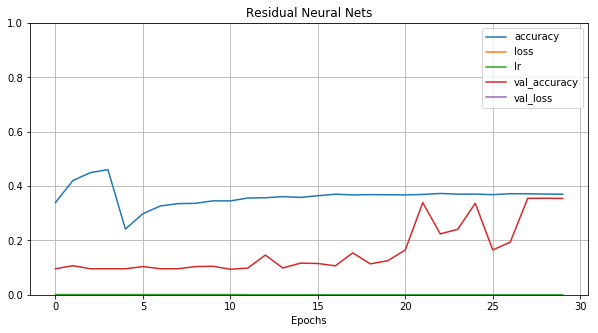

10000/10000 [==============================] - 13s 1ms/sample - loss: 1.8755 - accuracy: 0.3555


[1.875451368713379, 0.3555]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
dense_124 (Dense)            (None, 32, 32, 128)       512       
_________________________________________________________________
dense_125 (Dense)            (None, 32, 32, 128)       16512     
_________________________________________________________________
dense_126 (Dense)            (None, 32, 32, 128)       16512     
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 32, 32, 128)       0    

In [50]:
# Create the CIFAR ResNet here.
inputs = tf.keras.Input(shape=cx_train.shape[1:], name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
y = Flatten()(x)
outputs = Dense(10, activation='softmax')(y)
rc10model = tf.keras.Model(inputs, outputs, name='resnet')

rc10model.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert class vectors to binary class matrices.
cy_train = keras.utils.to_categorical(cy_train, 10)
cy_test = keras.utils.to_categorical(cy_test, 10)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]

rc10model_detail = rc10model.fit(cx_train, cy_train,
              batch_size=32,
              epochs=30,
              validation_split=0.1,
              shuffle=True,
              callbacks=callbacks)

#plot accuracies for each epoch
rc10history = pd.DataFrame(rc10model_detail.history)
rc10history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Residual Neural Nets')
plt.show()

#After training the model, evaluate the test set
rc10model.evaluate(cx_test,cy_test)

#Print the summary of the model
rc10model.summary()

#### Analysis:
- We can see the performance of Residual nets are good compared to normal functional API. Accuracies are imoproved using Residual nets.
- By Increasing number trainable layers, training time is increasing significantly per epoch. But it might increase the accuracy slightly.
- I think, we need to use convolute neural net filters with proper hyper parameters to improve the accuracy. 
- I tried, to tune the learning rate by using call back, but without proper filter, there is not increase in the accuracy.
- I think, we need to use convoluted neural nets with proper learning rate (Max learning rate/2). Max learning rate is the rate at which, acurracy declines. 
- I tried batch sizes 128 and 32 but it did not impact the accuracy. I think, batch size would be subjective to other hyperparameters like learning rate and epochs.
- I tried, epochs 20 and 30. Both gave same performance. High value for epochs is not attempted because of high train speed. We can use early stopping call back to reduce training speed.

### Step 11: Residual nets and gradient descent

- In a neural network, Gradient descent is used to minizie the error function and it is used during Forward propagation and Backworkd propagation.
- Forward propagation: Gradient descent is used to compute and pass the parameters to next layer. Parameters are calculated by minimize the cost function. Gradient descent is the method for minimization. In residual nets, residual layer also learns from the gradient and it will be added at the connection. 
- Backward propagation: Gradient descent is used to update the parameters to train the network. In residual nets, residual layer are updated by the gradients and contribute in updaing the parameters along the layer.
- Residual nets are used to pass the actual domain knowledge of input to next layers without manipuation, by skipping. In order to make the model better, we need to tune the hyperparameters of the module and more deepers layers should be added.

### Step 12: Res nets in project

- Pros of using Res nets
    1. Our data has a certain level of complexity. (Not linearly seprable). Training data is not huge. Using Res Nets, we can train better.

- Cons of using Res net
    1. As of data do not deal with images, number of input features is considerbaly less. As Residual nets have higher training speeds, compared to sequential and functional nets, we need to validate the performance of Functional API before using Residual nets. There is a chance that complexith of our data might not demand residual nets which would save the training speeds.